# House Prices Advanced Regression 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
pd.__version__

'1.1.5'

In [3]:
%pprint

Pretty printing has been turned OFF


In [4]:
#Hide Warnings
import warnings
warnings.filterwarnings("ignore")

In [5]:
# in kaggle
# train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
# test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [6]:
#in Jupyter Lab
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
house = pd.read_csv('House.csv')

In [7]:
print(train.shape)
print(test.shape)
print(house.shape)

(1460, 81)
(1459, 80)
(2930, 82)


In [8]:
pd.set_option('display.max_columns', None)
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [10]:
house.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [11]:
house.drop(['Order'],inplace=True,axis=1)
house.rename(columns={'PID':'Id'},inplace=True)
house.head()

,Id,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [12]:
house.columns

Index(['Id', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish',

In [13]:
names = list(house.columns)
for i in range(len(names)):
    names[i] = names[i].replace(r' ', '')
    names[i] = names[i].replace(r'/', '')
house.columns = names
names

['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC'

In [14]:
set(house.columns) - set(train.columns)

set()

In [15]:
train = pd.concat([train,house])
train.shape

(4390, 81)

In [16]:
# count of duplicated rows
train.duplicated().sum()

0

In [17]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,4.390000e+03,4390.000000,3641.000000,4390.000000,4390.000000,4390.000000,4390.000000,4390.000000,4359.000000,4389.000000,4389.000000,4389.000000,4389.000000,4390.000000,4390.000000,4390.000000,4390.000000,4388.000000,4388.000000,4390.000000,4390.000000,4390.000000,4390.000000,4390.000000,4390.000000,4150.000000,4389.000000,4389.000000,4390.000000,4390.000000,4390.000000,4390.000000,4390.000000,4390.000000,4390.000000,4390.000000,4390.000000,4390.000000
mean,4.768524e+08,57.224374,69.496842,10270.610478,6.096355,5.567198,1971.326879,1984.465831,102.492544,442.965596,48.666895,561.916382,1053.548872,1160.578360,339.292711,5.065148,1504.936219,0.429353,0.059936,1.566059,0.380638,2.858314,1.045103,6.467882,0.603872,1978.256627,1.766917,472.873092,93.915718,47.243052,22.659909,2.864237,15.689066,2.414806,48.258542,6.251253,2007.798861,180837.676993
std,3.702730e+08,42.521901,23.672399,8636.368783,1.401610,1.111845,30.227835,20.788634,179.746920,455.707913,166.586813,440.250582,439.939253,390.093834,431.102008,47.089888,512.231345,0.522810,0.243089,0.552206,0.502660,0.823702,0.216156,1.590798,0.646799,25.250453,0.756099,214.609942,126.008272,67.071414,63.145745,26.602442,55.973256,37.179280,543.951138,2.711034,1.320345,79730.212247
min,1.000000e+00,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,1.098250e+03,20.000000,59.000000,7500.000000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,0.000000,220.000000,793.000000,879.000000,0.000000,0.000000,1127.250000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,324.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,5.284770e+08,50.000000,68.000000,9452.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,375.000000,0.000000,468.000000,990.000000,1086.000000,0.000000,0.000000,1452.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,161000.000000
75%,9.034811e+08,70.000000,80.000000,11577.750000,7.000000,6.000000,2001.000000,2004.000000,164.000000,731.000000,0.000000,806.000000,1300.000000,1389.000000,715.750000,0.000000,1760.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213687.500000
max,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [18]:
#print columns name and type of them
colsAndTypes = zip( train.dtypes , train.columns )
for i in colsAndTypes:
    print(i,end="    ")    

(dtype('int64'), 'Id')    (dtype('int64'), 'MSSubClass')    (dtype('O'), 'MSZoning')    (dtype('float64'), 'LotFrontage')    (dtype('int64'), 'LotArea')    (dtype('O'), 'Street')    (dtype('O'), 'Alley')    (dtype('O'), 'LotShape')    (dtype('O'), 'LandContour')    (dtype('O'), 'Utilities')    (dtype('O'), 'LotConfig')    (dtype('O'), 'LandSlope')    (dtype('O'), 'Neighborhood')    (dtype('O'), 'Condition1')    (dtype('O'), 'Condition2')    (dtype('O'), 'BldgType')    (dtype('O'), 'HouseStyle')    (dtype('int64'), 'OverallQual')    (dtype('int64'), 'OverallCond')    (dtype('int64'), 'YearBuilt')    (dtype('int64'), 'YearRemodAdd')    (dtype('O'), 'RoofStyle')    (dtype('O'), 'RoofMatl')    (dtype('O'), 'Exterior1st')    (dtype('O'), 'Exterior2nd')    (dtype('O'), 'MasVnrType')    (dtype('float64'), 'MasVnrArea')    (dtype('O'), 'ExterQual')    (dtype('O'), 'ExterCond')    (dtype('O'), 'Foundation')    (dtype('O'), 'BsmtQual')    (dtype('O'), 'BsmtCond')    (dtype('O'), 'BsmtExposure') 

In [19]:
#specify OBJECT columns
categoricalCols=[]
colsAndTypes = zip( train.dtypes , train.columns )
for i in colsAndTypes:
    if i[0] == np.dtype('O'):
        categoricalCols.append(i[1])
[print(i,end=',') for i in categoricalCols]
len(categoricalCols)

MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,

43

#### We have 43 cols that have obj type,
#### So we have to convert them to numeric with get_dummy or oneHotEncoder in the following


In [20]:
numericCols =list(set(train.columns) - set(categoricalCols))
print(len(numericCols))
numericCols

38


['PoolArea', 'MasVnrArea', 'BsmtFullBath', 'MiscVal', '1stFlrSF', 'YearRemodAdd', 'GarageCars', 'OverallQual', 'MSSubClass', 'HalfBath', '3SsnPorch', 'GarageYrBlt', 'WoodDeckSF', 'BedroomAbvGr', 'EnclosedPorch', 'Id', 'OpenPorchSF', 'BsmtFinSF1', 'SalePrice', 'FullBath', 'BsmtFinSF2', 'LowQualFinSF', 'LotFrontage', 'TotalBsmtSF', 'YearBuilt', 'Fireplaces', 'GrLivArea', 'MoSold', 'YrSold', 'BsmtUnfSF', '2ndFlrSF', 'BsmtHalfBath', 'KitchenAbvGr', 'GarageArea', 'ScreenPorch', 'LotArea', 'OverallCond', 'TotRmsAbvGrd']

## Some preprossess I want to apply are:
* #### Drop columns with high outliers
* #### Drop some data with outlier values
* #### Drop ID col
* #### Convert all 'NaN' Values in 14 categorical Columns to 'NOT' (For example : "No Basement" stored as "NaN")
* #### Drop columns which have most null values
* #### Convert all categorical columns to numeric:
     ###### In data, we have three type of categorical columns: 1)Binary 2)Nominal and 3)Ordinal
     ###### I encode ordinal with OrdinalEncoder or .map() func and encode Binary and Nominal with Get_Dummy
     ###### *** Also, ‘MSSubClass’ Column has nominal values but encoded with numbers that may harm model, so I’m going to encode that with Get_dummy too.
* #### Find correlated columns and drop one of each
* #### get_dummy all remain categorical columns


## **Drop columns with high outliers and some data with outlier values*

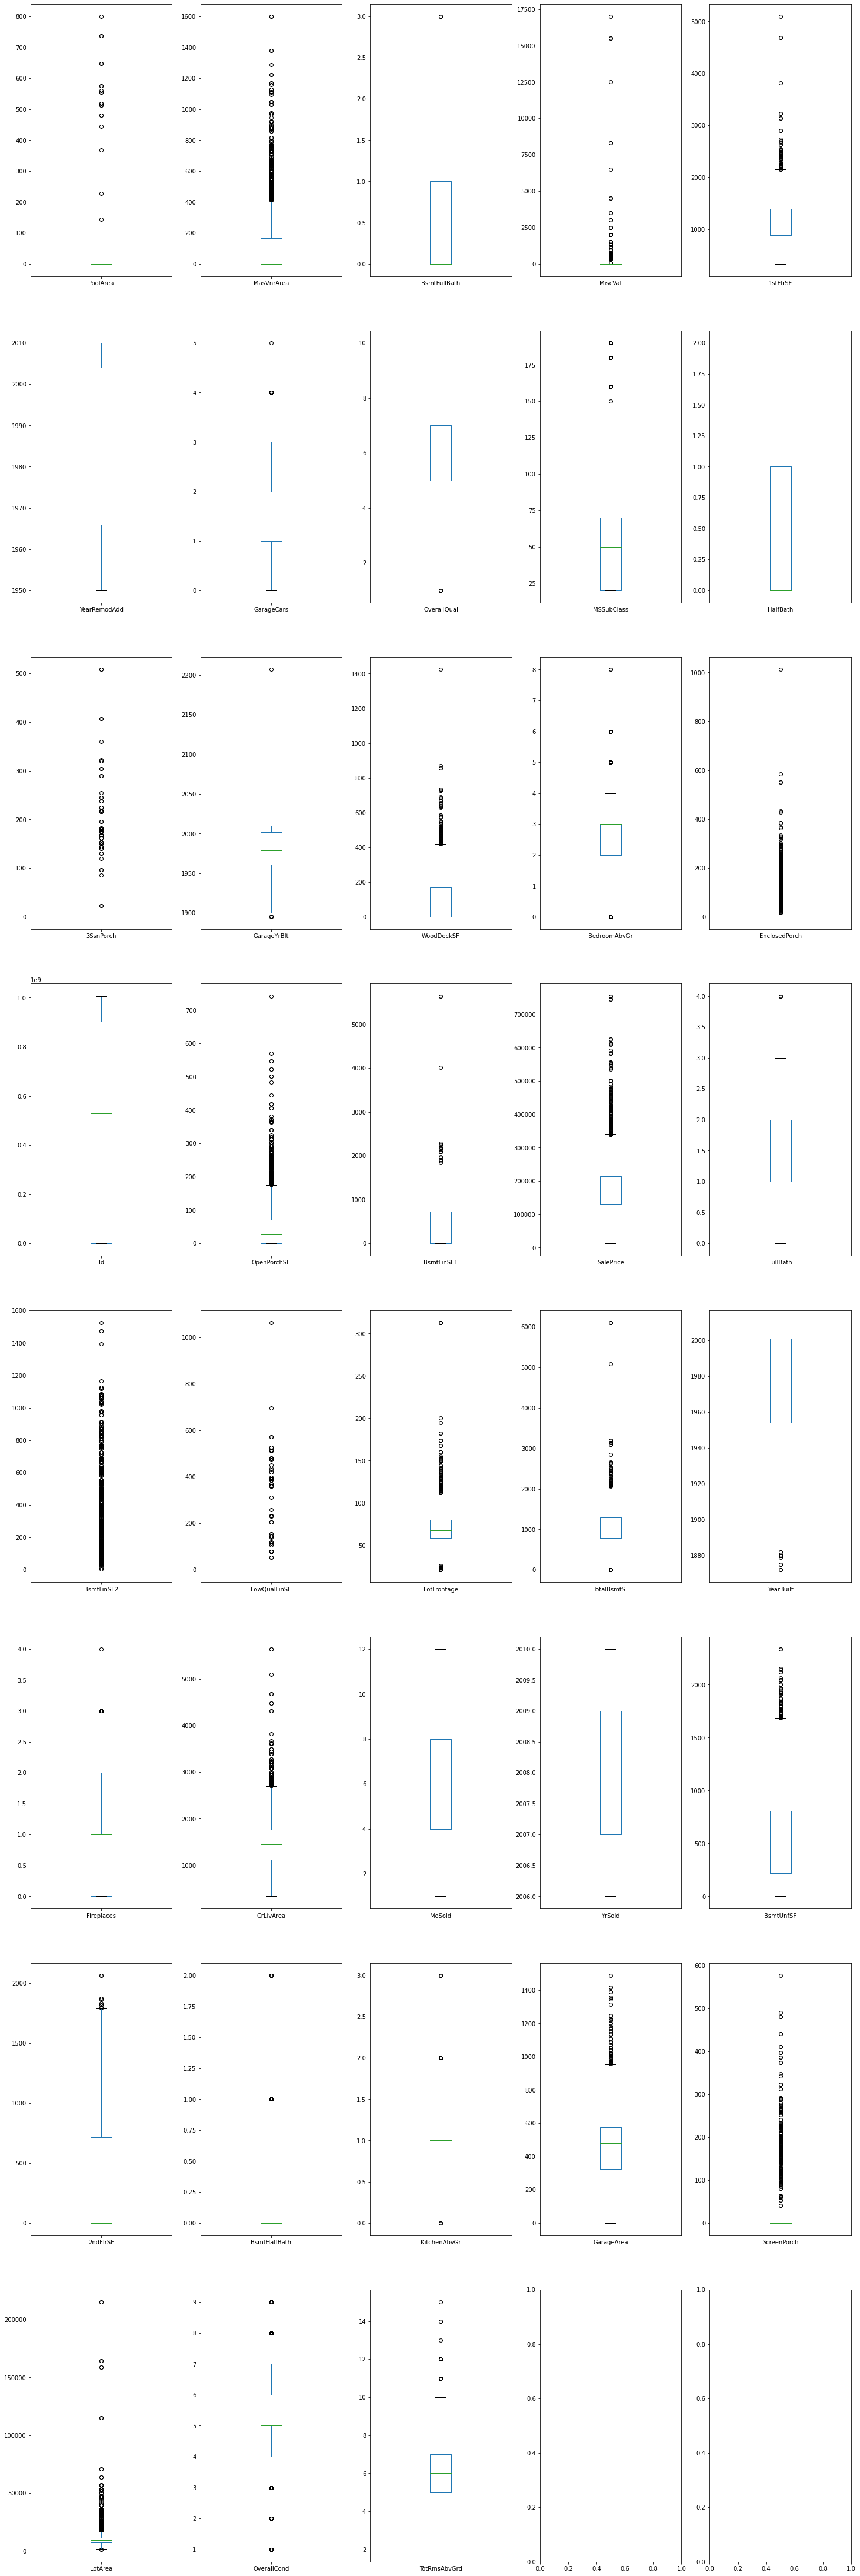

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
nrow = 8
ncols = 5

fig,axes = plt.subplots(nrows=nrow , ncols=ncols, figsize=(25,80))

counter = 0
for i in range(nrow):
    for j in range(ncols):
        train[numericCols[counter]].plot(kind = 'box', ax=axes[i,j])
        if counter ==37: break
        counter+=1


#### Now we can find and remove columns with high persentage of outlier data

In [22]:
# These columns have very high outliers so let's drop them
highOutliersCols = ['EnclosedPorch', 'BsmtFinSF2' , 'ScreenPorch', 'LowQualFinSF', 'MiscVal','PoolArea' , 'LotArea', '3SsnPorch']

train.drop(highOutliersCols, axis=1 , inplace=True)
test.drop(highOutliersCols, axis=1 , inplace=True)
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,NaN,NaN,NaN,2,2008,WD,Normal,208500
1,2,20,RL,80.0,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,NaN,NaN,NaN,5,2007,WD,Normal,181500
2,3,60,RL,68.0,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,NaN,NaN,NaN,9,2008,WD,Normal,223500
3,4,70,RL,60.0,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,NaN,NaN,NaN,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,NaN,NaN,NaN,12,2008,WD,Normal,250000


In [23]:
# now let's drop some data with high outliers values
print('1stFlrSF',len( train[train['1stFlrSF']>2100]))
# I'm going to drop LotFrontage col in following, so i don't
# delete outliers of this col
# print(len( train[train['LotFrontage']>130]))
print('MasVnrArea',len( train[train['MasVnrArea']>600]))
print('GrLivArea',len( train[train['GrLivArea']>2800]))
print('WoodDeckSF',len( train[train['WoodDeckSF']>400]))
#____changed
print('SalePrice',len(train[train['SalePrice']>350000]))
print('BsmtFinSF1',len(train[train['BsmtFinSF1']>2000]))
print('OpenPorchSF',len(train[train['OpenPorchSF']>250]))

1stFlrSF 77
MasVnrArea 112
GrLivArea 68
WoodDeckSF 121
SalePrice 173
BsmtFinSF1 14
OpenPorchSF 76


In [24]:
train = train[train['1stFlrSF']<=2100 ]
# train = train[train['LotFrontage']<=130]
train = train[train['MasVnrArea']<=600]
train = train[train['GrLivArea']<=2800]
train = train[train['WoodDeckSF']<=400]
#----
train = train[train['SalePrice']<=350000]
train = train[train['BsmtFinSF1']<=2000]
train = train[train['OpenPorchSF']<=250]

train.shape

(3912, 73)

## **Drop ID column*

In [25]:
train.drop(['Id'],inplace=True,axis=1)
test.drop(['Id'],inplace=True,axis=1)

In [26]:
train.head()

,MSSubClass,MSZoning,LotFrontage,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,NaN,NaN,NaN,2,2008,WD,Normal,208500
1,20,RL,80.0,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,NaN,NaN,NaN,5,2007,WD,Normal,181500
2,60,RL,68.0,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,NaN,NaN,NaN,9,2008,WD,Normal,223500
3,70,RL,60.0,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,NaN,NaN,NaN,2,2006,WD,Abnorml,140000
4,60,RL,84.0,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,NaN,NaN,NaN,12,2008,WD,Normal,250000


## **Convert all Categorical 'NaN' Values in 14 Columns to 'NOT' (For example : "No Basement" stores as "NaN")*

In [27]:
# First lets merge two train and test dataframes, cuz they have to preprosses together
# allData = train.append(test, ignore_index=True)
# print(allData.shape)
# allData.tail(5)

In [28]:
#These 14 categorical cols have NaN Values
nanColNames = ['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
               'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']
for i in nanColNames:
    train[i].replace(np.NaN , 'NOT' , inplace=True)
    test[i].replace(np.NaN , 'NOT' , inplace=True)

train.head()

,MSSubClass,MSZoning,LotFrontage,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,Pave,NOT,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NOT,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,NOT,NOT,NOT,2,2008,WD,Normal,208500
1,20,RL,80.0,Pave,NOT,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,NOT,NOT,NOT,5,2007,WD,Normal,181500
2,60,RL,68.0,Pave,NOT,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,NOT,NOT,NOT,9,2008,WD,Normal,223500
3,70,RL,60.0,Pave,NOT,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,NOT,NOT,NOT,2,2006,WD,Abnorml,140000
4,60,RL,84.0,Pave,NOT,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,NOT,NOT,NOT,12,2008,WD,Normal,250000


## **Drop columns which have most null values*

In [29]:
[(train.isnull().sum()).sort_values(ascending=False)]

[LotFrontage    659
GarageYrBlt    230
Electrical       2
GarageCars       1
GarageArea       1
              ... 
1stFlrSF         0
CentralAir       0
HeatingQC        0
Heating          0
MSSubClass       0
Length: 72, dtype: int64]

In [30]:
[(test.isnull().sum()).sort_values(ascending=False)]

[LotFrontage     227
GarageYrBlt      78
MasVnrType       16
MasVnrArea       15
MSZoning          4
               ... 
CentralAir        0
HeatingQC         0
Heating           0
BsmtFinType2      0
MSSubClass        0
Length: 71, dtype: int64]

In [31]:
# Overall
[((test.isnull().sum()) + (train.isnull().sum()) ).sort_values(ascending=False)]

[LotFrontage     886.0
GarageYrBlt     308.0
MasVnrType       16.0
MasVnrArea       15.0
MSZoning          4.0
                ...  
HalfBath          0.0
YearRemodAdd      0.0
GarageType        0.0
1stFlrSF          0.0
SalePrice         NaN
Length: 72, dtype: float64]

In [32]:
train.drop(['LotFrontage','GarageYrBlt'], inplace=True, axis =1)
test.drop(['LotFrontage','GarageYrBlt'], inplace=True, axis =1)
train.shape

(3912, 70)

## **Convert some categorical columns to numeric* :
   ###### In data, we have three type of categorical columns: 1)Binary 2)Nominal and 3)Ordinal
   ###### I encode Binary and Ordinal with OrdinalEncoder or .map() func and encode Nominal with Get_Dummy

### First Let's encode Ordinal columns

In [33]:
train.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold',
       '

In [34]:
ordinalColumns = ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu',
                   'GarageQual','GarageCond','PoolQC']
enc_dict = { 'Ex': 5,'Gd':4, 'TA':3, 'Fa':2,'Po':1,'NOT':0}
for i in ordinalColumns:
    train[i] = train[i].map(enc_dict)
    test[i] = test[i].map(enc_dict)
train[ordinalColumns].head()

,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond,PoolQC
0,4,3,4,3,5,4,0,3,3,0
1,3,3,4,3,5,3,3,3,3,0
2,4,3,4,3,5,4,3,3,3,0
3,3,3,3,4,4,4,4,3,3,0
4,4,3,4,3,5,4,3,3,3,0


In [35]:
#This col has different encode so I have to encode individually
train['BsmtExposure'] = train['BsmtExposure'].map({'NOT':0, 'No':1, 'Mn':2,'Av':3,'Gd':4})
test['BsmtExposure'] = test['BsmtExposure'].map({'NOT':0, 'No':1, 'Mn':2,'Av':3,'Gd':4})
train['BsmtExposure'].unique()

array([1, 4, 2, 3, 0], dtype=int64)

In [36]:
#This col has different encode so I have to encode individually
enc_dict2 = {'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1, 'NOT':0}
for i in ['BsmtFinType1','BsmtFinType2']:
    train[i] = train[i].map(enc_dict2)
    test[i] = test[i].map(enc_dict2)
train[['BsmtFinType1','BsmtFinType2']].head()

,BsmtFinType1,BsmtFinType2
0,6,1
1,5,1
2,6,1
3,5,1
4,6,1


In [37]:
#This col has different encode so I have to encode individually
train['Fence'] = train['Fence'].map({'NOT':0, 'MnWw':1, 'GdWo':2,'MnPrv':3,'GdPrv':4})
test['Fence'] = test['Fence'].map({'NOT':0, 'MnWw':1, 'GdWo':2,'MnPrv':3,'GdPrv':4})
train['Fence'].unique()

array([0, 3, 2, 4, 1], dtype=int64)

In [38]:
#This col has different encode so I have to encode individually
train['CentralAir'] = train['CentralAir'].map({'N':0, 'Y':1})
test['CentralAir'] = test['CentralAir'].map({'N':0, 'Y':1})
train['CentralAir'].head()

0    1
1    1
2    1
3    1
4    1
Name: CentralAir, dtype: int64

##### So all Ordinal and binary columns have coded!

## **Find correlated Columns and drop one of them*

<AxesSubplot:>

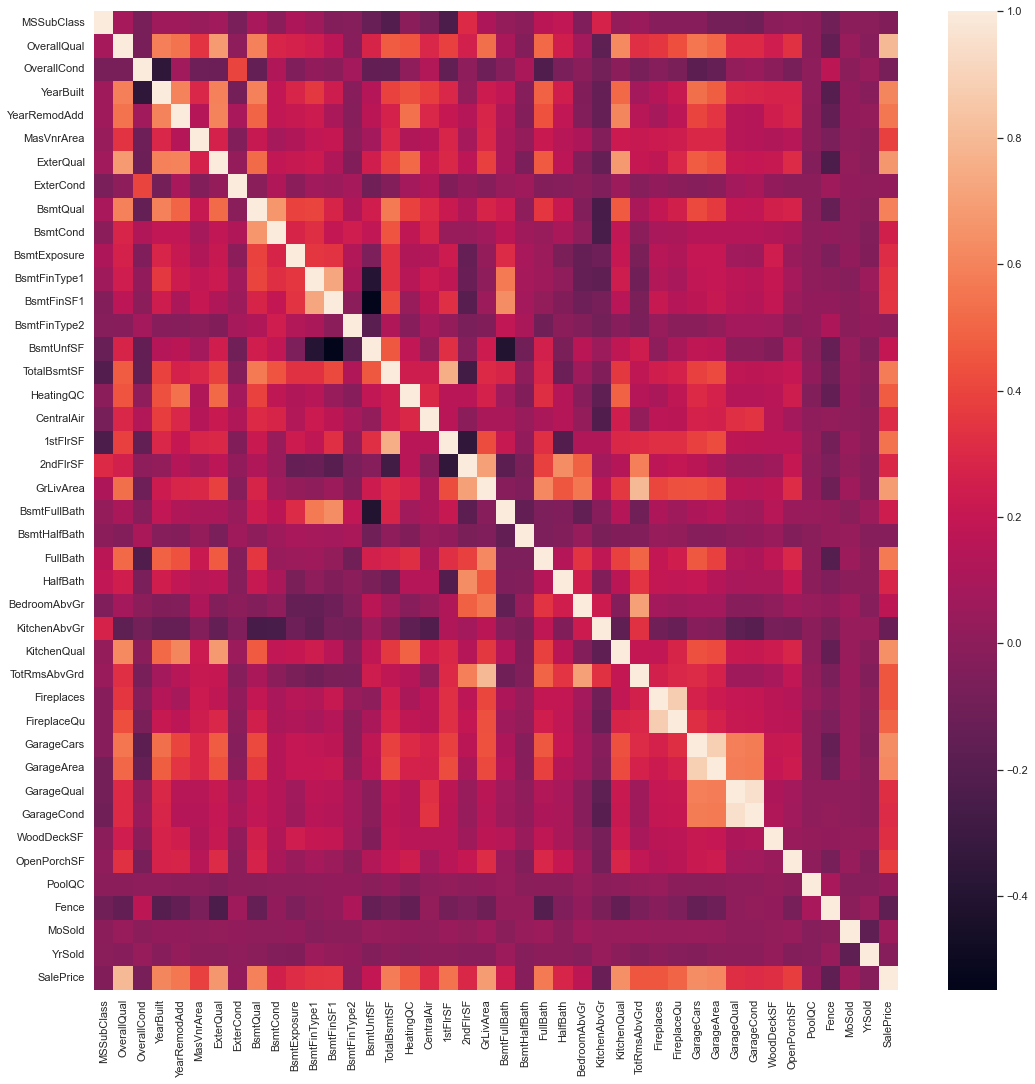

In [39]:
import seaborn as sns
sns.set(rc={'figure.figsize':(18,18)})
sns.heatmap(train.corr())

##### We can use Heatmap to find correlated columns directly but I want to extract their name

In [40]:
# Finding Correlated columns that have correlation above 0.75
coMat = train.corr()> 0.75
# Set false all main diag values because each column is fully correlated with itself
coMat.values[[np.arange(coMat.shape[0])]*2] = False
coMat.head()

,MSSubClass,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,PoolQC,Fence,MoSold,YrSold,SalePrice
MSSubClass,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
OverallQual,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
OverallCond,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
YearBuilt,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
YearRemodAdd,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [41]:
# Get indexlist of True Values
trueVals = np.where(coMat == True)
trueVals

(array([ 1, 15, 18, 20, 28, 29, 30, 31, 32, 33, 34, 41], dtype=int32), array([41, 18, 15, 28, 20, 30, 29, 32, 31, 34, 33,  1], dtype=int32))

In [42]:
# convert two list --> tuples of indexes
trueVals = zip(trueVals[0],trueVals[1])

# Removing all duplicate tuples from the list
sortedTup = [tuple(sorted(val)) for val in trueVals] #sort tuples
tupListWODup = list(set(sortedTup)) # remove duplicated tuples by converting to set
tupListWODup

[(15, 18), (33, 34), (1, 41), (29, 30), (20, 28), (31, 32)]

#### So one column of each tuple has to remove because they are high correlated

In [43]:
corrVals = train.corr()
for i in tupListWODup:
    print(corrVals.columns[i[0]],"  AND  ",corrVals.columns[i[1]],"  |  Corr : ",corrVals.iloc[i[0],i[1]])

TotalBsmtSF   AND   1stFlrSF   |  Corr :  0.7526663387957518
GarageQual   AND   GarageCond   |  Corr :  0.9540040781365189
OverallQual   AND   SalePrice   |  Corr :  0.797090238664788
Fireplaces   AND   FireplaceQu   |  Corr :  0.8758093752413649
GrLivArea   AND   TotRmsAbvGrd   |  Corr :  0.7990855443674549
GarageCars   AND   GarageArea   |  Corr :  0.8850545563467609


##### We can see, OverallQual Column is correlated with SalePrice(Target), So it will be usefull for our model!

In [44]:
#drop one of correlated columns
train.drop(['1stFlrSF','GarageCond','FireplaceQu','TotRmsAbvGrd','GarageCars'], axis=1,inplace=True)
test.drop(['1stFlrSF','GarageCond','FireplaceQu','TotRmsAbvGrd','GarageCars'], axis=1,inplace=True)
train.shape

(3912, 65)

In [45]:
#find negatively correlated columns
coMatNeg = train.corr() < (-0.75)
coMatNeg.values[[np.arange(coMatNeg.shape[0])]*2] = False
trueVals = np.where(coMatNeg == True)
trueVals

(array([], dtype=int32), array([], dtype=int32))

## Fill NaN Vals
##### **we have to fill NaN vals in train and test set separately to avoid data leakage,*
##### *So we have to split our train(labeled data) to test & train and fill NaN Separately*

In [46]:
train.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,GarageType,GarageFinish,GarageArea,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,Pave,NOT,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,4,3,1,6,706.0,1,150.0,856.0,GasA,5,1,SBrkr,854,1710,1.0,0.0,2,1,3,1,4,Typ,0,Attchd,RFn,548.0,3,Y,0,61,0,0,NOT,2,2008,WD,Normal,208500
1,20,RL,Pave,NOT,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,4,3,4,5,978.0,1,284.0,1262.0,GasA,5,1,SBrkr,0,1262,0.0,1.0,2,0,3,1,3,Typ,1,Attchd,RFn,460.0,3,Y,298,0,0,0,NOT,5,2007,WD,Normal,181500
2,60,RL,Pave,NOT,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,4,3,2,6,486.0,1,434.0,920.0,GasA,5,1,SBrkr,866,1786,1.0,0.0,2,1,3,1,4,Typ,1,Attchd,RFn,608.0,3,Y,0,42,0,0,NOT,9,2008,WD,Normal,223500
3,70,RL,Pave,NOT,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,3,BrkTil,3,4,1,5,216.0,1,540.0,756.0,GasA,4,1,SBrkr,756,1717,1.0,0.0,1,0,3,1,4,Typ,1,Detchd,Unf,642.0,3,Y,0,35,0,0,NOT,2,2006,WD,Abnorml,140000
4,60,RL,Pave,NOT,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,4,3,PConc,4,3,3,6,655.0,1,490.0,1145.0,GasA,5,1,SBrkr,1053,2198,1.0,0.0,2,1,4,1,4,Typ,1,Attchd,RFn,836.0,3,Y,192,84,0,0,NOT,12,2008,WD,Normal,250000


In [47]:
# Split Data to test and train
from sklearn.model_selection import train_test_split

X_train , X_test, y_train, y_test = train_test_split(train.iloc[:, :-1], train.iloc[:,-1] , random_state= 0)
print( "X_train:" , X_train.shape ,", y_train:",y_train.shape )
print( "X_test:" , X_test.shape ,", y_test:",y_test.shape )

X_train: (2934, 64) , y_train: (2934,)
X_test: (978, 64) , y_test: (978,)


In [48]:
# Find Columns With Nan Values in X_train and X_test
[ i for i in zip(X_train.columns, X_train.isna().any()) if i[1] ]

[('Electrical', True), ('GarageArea', True)]

In [49]:
[ i for i in zip(X_test.columns, X_test.isna().any()) if i[1] ]

[]

So we have two column with NaN value and one of them is Categorical, Let's fill it

In [50]:
X_train['Electrical'].fillna(method='bfill' ,inplace=True)

In [51]:
X_train['GarageArea'].fillna(np.mean(X_train['GarageArea']),inplace=True)

In [52]:
#Double Check
[ i for i in zip(X_train.columns, X_train.isna().any()) if i[1] ]

[]

##### And Test Data

In [53]:
# Find Columns With Nan Values ( consists of categorical and numeric)
[ i for i in zip(test.columns, test.isna().any()) if i[1] ]

[('MSZoning', True), ('Utilities', True), ('Exterior1st', True), ('Exterior2nd', True), ('MasVnrType', True), ('MasVnrArea', True), ('BsmtFinSF1', True), ('BsmtUnfSF', True), ('TotalBsmtSF', True), ('BsmtFullBath', True), ('BsmtHalfBath', True), ('KitchenQual', True), ('Functional', True), ('GarageArea', True), ('SaleType', True)]

In [54]:
# Get categorical columns using intersection
categWithNan = set(categoricalCols) & set([i[0] for i in zip(test.columns, test.iloc[:,:-1].isna().any()) if i[1] ])
categWithNan

{'Exterior2nd', 'Utilities', 'MasVnrType', 'Functional', 'KitchenQual', 'Exterior1st', 'MSZoning', 'SaleType'}

In [55]:
# Get numeric columns with - operator
numericWithNan = set([i[0] for i in zip(test.columns, test.iloc[:,:-1].isna().any()) if i[1] ]) - categWithNan
numericWithNan

{'MasVnrArea', 'BsmtFullBath', 'BsmtUnfSF', 'BsmtHalfBath', 'BsmtFinSF1', 'TotalBsmtSF', 'GarageArea'}

In [56]:
# Fill Nan values in categorical columns with next value
for i in categWithNan:
    test[i].fillna(method='bfill' ,inplace=True)

In [57]:
# Fill Nan values in numeric columns with mean of column
for i in numericWithNan:
    test[i].fillna(value =  test[i].mean(), inplace=True)

In [58]:
[ i for i in zip(test.columns, test.isna().any()) if i[1] ]

[]

## *5)Get_Dummy*

In [59]:
X_train.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'Functional', 'Fireplaces', 'GarageType',
       'GarageFinish', 'GarageArea', 'GarageQual', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [60]:
# We Drop some categorical columns, So first let's extract categorical columns name again
#specify OBJECT columns
categoricalCols=[]
colsAndTypes = zip( X_train.dtypes , X_train.columns )
for i in colsAndTypes:
    if i[0] == np.dtype('O'):
        categoricalCols.append(i[1])
#***‘MSSubClass’ column has nominal values but encoded with numbers that may harm model,
# so I’m going to encode that with Get_dummy too.
categoricalCols.append('MSSubClass')

# Also I want to encode year and month too, So:
for i in ['YearBuilt','YearRemodAdd','MoSold','YrSold']:
    categoricalCols.append(i)
[print(i,end=',') for i in categoricalCols]
len(categoricalCols)

MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,Electrical,Functional,GarageType,GarageFinish,PavedDrive,MiscFeature,SaleType,SaleCondition,MSSubClass,YearBuilt,YearRemodAdd,MoSold,YrSold,

33

In [61]:
print(X_train.shape)
print(X_test.shape)
print(test.shape)

(2934, 64)
(978, 64)
(1459, 64)


In [62]:
allData_ = pd.concat([X_train,X_test,test])
allData_.shape

(5371, 64)

In [63]:
allData_['MSSubClass'] = allData_['MSSubClass'].astype(object)
for i in ['YearBuilt','YearRemodAdd','MoSold','YrSold']:
    allData_[i] = allData_[i].astype(object)
allData_dummy = pd.concat( [ allData_.drop(categoricalCols,axis=1), pd.get_dummies(allData_[categoricalCols])],axis=1)
allData_dummy.head()

,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,PoolQC,Fence,MSZoning_A (agr),MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_NOT,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,Utilities_NoSewr,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_PreCast,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_PreCast,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_CBlock,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NOT,GarageFinish_Fin,GarageFinish_NOT,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_N,PavedDrive_P,PavedDrive_Y,MiscFeature_Gar2,MiscFeature_NOT,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,SaleType_WD,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,M

In [64]:
X_train_dummy = allData_dummy.iloc[:2934,:]
X_test_dummy = allData_dummy.iloc[2934:3912,:]
test_dummy = allData_dummy.iloc[3912:,:]

In [65]:
print(X_train_dummy.shape)
print(X_test_dummy.shape)
print(test_dummy.shape)

(2934, 442)
(978, 442)
(1459, 442)


In [66]:
test_dummy.head()

,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,PoolQC,Fence,MSZoning_A (agr),MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_NOT,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,Utilities_NoSewr,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_PreCast,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_PreCast,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_CBlock,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NOT,GarageFinish_Fin,GarageFinish_NOT,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_N,PavedDrive_P,PavedDrive_Y,MiscFeature_Gar2,MiscFeature_NOT,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,SaleType_WD,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,M

## Preprocessing is complete.
### Let's create a model and test it, I selected GradientBoostingRegressor for this problem

In [67]:
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.model_selection import GridSearchCV
# params = {
# 'loss':["squared_error"] ,
# 'n_estimators':[450,350,250] ,
# 'learning_rate':[0.25,0.01],
# 'max_depth':[3,4,5],
# 'max_features' : [40,60,80] ,
# 'random_state':[0]
# }
# gbr = GradientBoostingRegressor()
# gridSearch = GridSearchCV(estimator= gbr , param_grid= params)
# gridSearch.fit(pd.concat([X_train_dummy,X_test_dummy]) , pd.concat([y_train,y_test]))
# print(gridSearch.best_params_)

In [68]:
# gridSearch.best_score_

In [77]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

gbr2 = GradientBoostingRegressor(learning_rate= 0.25,
                                 loss= 'squared_error',
                                 max_depth= 3,
                                 max_features= 200,
                                 n_estimators= 250,
                                 random_state= 0)

In [81]:
gbr2.fit(X_train_dummy,y_train)
print(gbr2.score(X_train_dummy,y_train))
print(gbr2.score(X_test_dummy,y_test))

0.9815731664418342
0.9455913538876998


In [83]:
# 10 most important features
sorted(list(zip(test_dummy.columns, gbr2.feature_importances_)),key = lambda x: x[1],reverse=True)[:10]

[('OverallQual', 0.3140991373547923), ('GrLivArea', 0.1649400105510452), ('ExterQual', 0.15275564926226465), ('KitchenQual', 0.06725129340186294), ('GarageArea', 0.052633050198541094), ('TotalBsmtSF', 0.0470122281090633), ('BsmtQual', 0.036991782907484894), ('BsmtFinSF1', 0.022800889388758776), ('Fireplaces', 0.012533728815516784), ('GarageType_Attchd', 0.009724432505231556)]

In [ ]:
# predDF = pd.DataFrame( data={'Id':np.arange(1461,2920,1) , 'SalePrice':gbr2.predict(test_dummy.iloc[:,:])}).set_index('Id')
# predDF

In [ ]:
# predDF.to_csv('submission.csv')

## Thanks For Reading ;)